In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

- 散点图
- 折线图
- 条形图
- 直方图
- 饼状图
- 箱型图

### （1）散点图 
- 显示两组数据的值，每个点的坐标由变量的值决定
- 由一组不连续的点完成，用于观察两种变量的相关性（身高-体重、温度-维度等）

**函数说明**

plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
- x 输入数据，形如shape (n,) 的数组
- y 输入数据，形如shape (n,) 的数组
- s=None 标量，表示 size 大小
- c=None 颜色，可选默认
- marker=None 图标 MarkerStyle，默认'o'
- cmap=None, 图谱，与颜色c配合使用，
        - 参考 (c=np.random.uniform(1, 2, 20), cmap=plt.cm.Spectral)
- norm=None 归一化，用于将亮度数据缩放到 0-1
- vmin=None, vmax=None 与norm一起使用来进行标准化亮度数据，可选默认
- alpha=None, 透明度，介于0-1之间，可选默认
- linewidths=None, 边缘线宽，取值标量或数组类型，可选默认
- verts=None, 
- edgecolors=None, 边缘线宽，可选默认

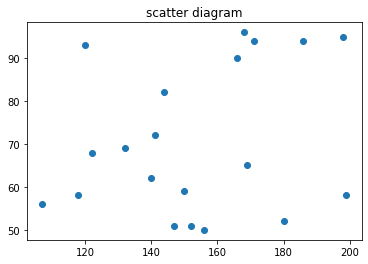

In [55]:
# 随机散点图
height = [random.randint(100, 200) for _ in range(20)]
weight = [random.randint(50, 100) for _ in range(20)]
plt.scatter(height,weight)
# plt.scatter(height,weight, c=np.random.uniform(1, 2, 20), cmap=plt.cm.Spectral)
plt.title('scatter diagram')
plt.show()

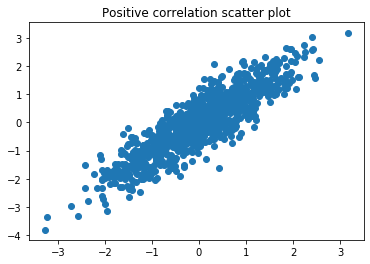

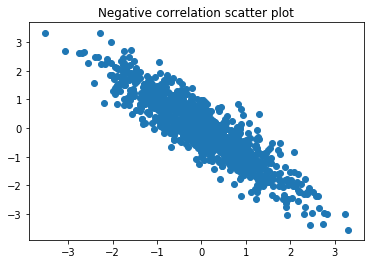

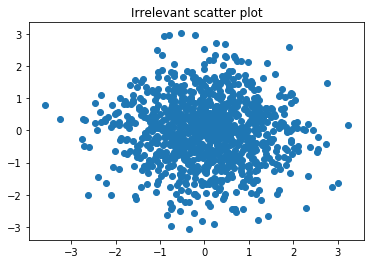

In [56]:
#正相关
N = 1000
x = np.random.randn(N)
y2 = x + np.random.randn(N) * 0.5
plt.scatter(x,y2)
plt.title('Positive correlation scatter plot')
plt.show()

#负相关
N = 1000
x = np.random.randn(N)
y2 = -x + np.random.randn(N) * 0.5
plt.scatter(x,y2)
plt.title('Negative correlation scatter plot')
plt.show()


#不相关
N = 1000
x = np.random.randn(N)
y1 = np.random.randn(N)
plt.scatter(x, y1)
plt.title('Irrelevant scatter plot')
plt.show()

股票数据散点图 【日期，开盘价，最高价，最低价，收盘价，成交量，成交量】

In [57]:
! head data/data.csv

Date,Open,High,Low,Close,Turnover,Volume
1/5/2015,3258.63,3369.28,3253.88,3350.52,549760.13,53135238400
1/6/2015,3330.8,3394.22,3303.18,3351.45,532398.46,50166169600
1/7/2015,3326.65,3374.9,3312.21,3373.95,436416.7,39191888000
1/8/2015,3371.96,3381.57,3285.1,3293.46,399230.3,37113116800
1/9/2015,3276.97,3404.83,3267.51,3285.41,458648,41024086400
1/12/2015,3258.21,3275.19,3191.58,3229.32,366273.06,32206467200
1/13/2015,3223.54,3259.39,3214.41,3235.3,273588.77,23072576000
1/14/2015,3242.34,3268.48,3193.98,3222.44,267204.53,24019075200
1/15/2015,3224.07,3337.08,3207.54,3336.46,330610.53,28254624000


In [58]:
! wc -l data/data.csv

243 data/data.csv


#open type: <class 'numpy.ndarray'>
#close type: <class 'numpy.ndarray'>
#open: 242
#close: 242


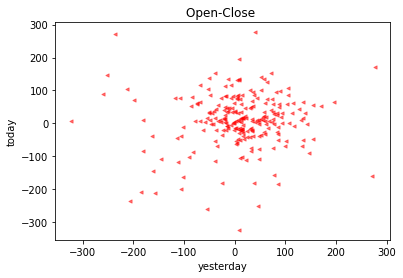

In [45]:
#股票相关:开盘价和关盘价 (涨幅相关散点图)
open, close = np.loadtxt('data/data.csv',
                        delimiter = ',', # 分隔符
                        skiprows = 1,    # 跳过第一行
                        usecols = (1,4), # Open,Close
                        unpack = True)   # 把每列当成一个向量输出，不合并

print('#open type:', type(open))
print('#close type:', type(close))
print('#open:', len(open))
print('#close:', len(close))

change = close-open
yesterday = change[:-1]
today = change[1:]

plt.scatter(yesterday,
            today,
            s=10,  #面积
            c='r', #颜色 
            marker='<', #形状
            alpha=0.5)  #透明度
plt.title('Open-Close ')
plt.xlabel('yesterday')
plt.ylabel('today')
plt.show()

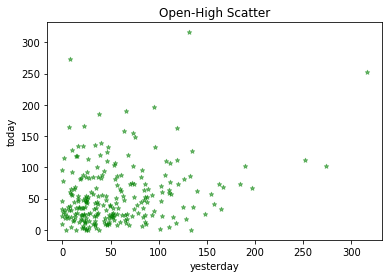

In [39]:
#股票相关:开盘价和最高价
open, maxmize = np.loadtxt('data/data.csv',
                          delimiter=',',
                          skiprows=1,
                          usecols=(1,2),
                          unpack=True)
change = maxmize-open
yesterday = change[:-1]
today = change[1:]
plt.scatter(yesterday,
            today,
            s=20,
            c='g',
            marker='*',
            alpha=0.5)
plt.title('Open-High Scatter')
plt.xlabel('yesterday')
plt.ylabel('today')
plt.show()

### （2）折线图 
- 用直线段将数据连接起来的图形
- 一般用于观察数据随时间变化的趋势（股票价格、温度变化等）

**函数说明**

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
- x 输入数据，形如shape (n,) 的数组
- y 输入数据，形如shape (n,) 的数组
- color 颜色，可选默认
- marker 图标 MarkerStyle，默认'o'
- linestyle 线形风格, ``'-'``          实线, ``'--'``         虚线 ,``'-.'``         点画线，``':'``          点线，可选默认
    
- linewidth 线形风格宽度, 可选默认
- markersize 图标大小，可选默认

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

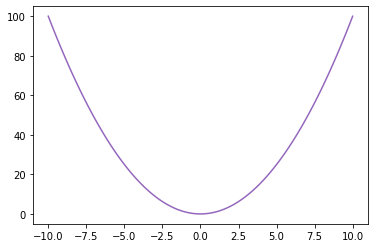

In [47]:
# 随机折线图
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y,c='#9467bd',)
plt.show()

股票开盘-闭盘时间序列折线图

/home/wangqingqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The bytespdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  """
/home/wangqingqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  """


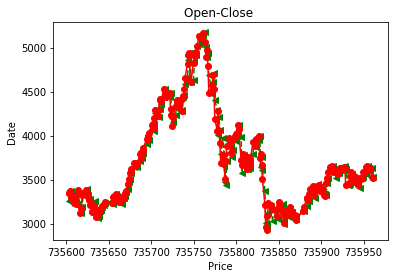

In [50]:
# 股票时间序列(开盘，闭盘）
# Date,Open,High,Low,Close,Turnover,Volume
date,open,close=np.loadtxt('data/data.csv',
                           delimiter=',',
                           converters={0:mdates.bytespdate2num('%m/%d/%Y')},
                           skiprows=1,
                           usecols=(0,1,4),
                           unpack=True)
plt.plot(date,
         open,
         linestyle = '--', 
         color='green',
         marker = '<')

plt.plot(date,
         close,
         linestyle = '-', 
         color='red',
         marker = 'o')

plt.title('Open-Close ')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

#date[0:5]: [735603. 735604. 735605. 735606. 735607.]


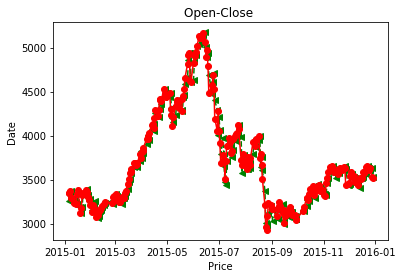

In [51]:
print('#date[0:5]:', date[0:5])
plt.plot_date(date,
              open,
              linestyle = '--', 
              color='green',
              marker = '<')

plt.plot_date(date,
              close,
              linestyle = '-', 
              color='red',
              marker = 'o')
              
plt.title('Open-Close ')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

股票 (开盘-最高价-最低价-闭盘) 时间序列折线图

/home/wangqingqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The bytespdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  """
/home/wangqingqin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  """


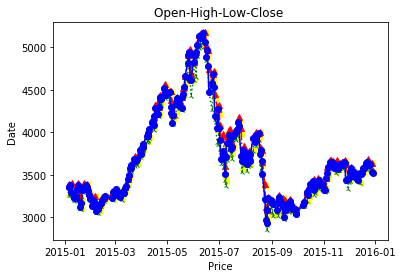

In [53]:
# 股票 (开盘-最高价-最低价-闭盘) 时间序列折线图
# Date,Open,High,Low,Close,Turnover,Volume
date,open,high,low,close=np.loadtxt('data/data.csv',
                                    delimiter=',',
                                    converters={0:mdates.bytespdate2num('%m/%d/%Y')},
                                    skiprows=1,
                                    usecols=(0,1,2,3,4),
                                    unpack=True)

plt.plot_date(date, open, linestyle = '--', color='yellow', marker = '<')
plt.plot_date(date, high, linestyle = '-.', color='red', marker = '^')
plt.plot_date(date, low, linestyle = ':', color='green', marker = '2')
plt.plot_date(date, close, linestyle = '-', color='blue', marker = 'o')
plt.title('Open-High-Low-Close ')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

正弦图像

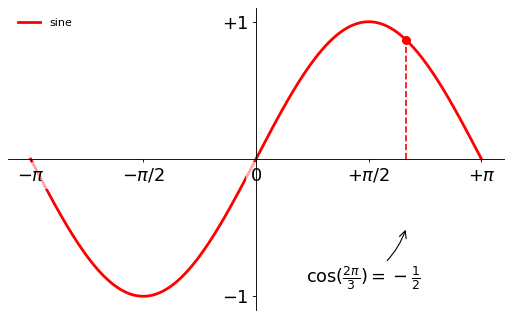

In [54]:
# 正弦图像
plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
S = np.sin(X)

plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine",
         zorder=-2)

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

plt.legend(loc='upper left', frameon=False)

t = 2*np.pi/3

plt.plot([t,t],[0,np.sin(t)],
         color ='red',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),  xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65 ))

plt.show()

### （3）条形图
- 以长方形的长度为变量的统计图表
- 用来比较多个类目大小的数据分布
- 通常的用于分析小数据集（季度销量、国家人口）

**函数说明**

plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
- x 输入数据条形的的X坐标，形如shape (n,) 的数组
- height 输入数据条形高度，标量或标量序列
- width 条形宽度，标量或类似数组，可选默认
- bottom 标量或类似数组，条形基础的y坐标，可选默认
- align 对齐:{ 'center'居中，'edge'边缘 }，可选默认:'center居中'
    - 'center': 将底座置于*x*位置的中心；
    - 'edge': 将条形的左边缘与*x*位置对齐（要对齐右边的条形，可传递负*宽度*）；

In [60]:
import numpy as np
import matplotlib.pyplot as plt

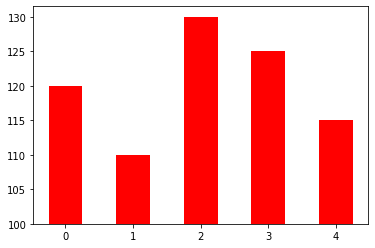

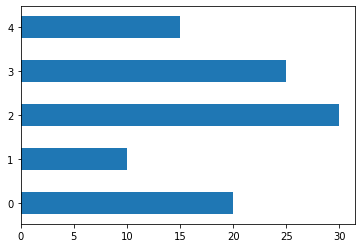

In [61]:
# 随机条形图
N=5
y=[20,10,30,25,15]
index = np.arange(N)
# bottom 指的是最底层坐标
p1 = plt.bar(x=index, 
             height=y,
             width=0.5,
             bottom=100,
             color='red')
plt.show()

p2 = plt.bar(x=0, 
             bottom=index,
             width=y,
             height=0.5,
             orientation='horizontal')
plt.show()

双条形图

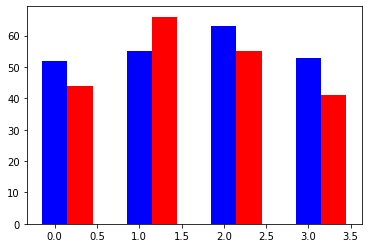

In [62]:
# 双条形图
index= np.arange(4)
sales_BJ = [52,55,63,53]
sales_SH = [44,66,55,41]

bar_width = 0.3

plt.bar(index, sales_BJ, bar_width, color = 'b')
plt.bar(index+bar_width, sales_SH, bar_width, color = 'r')
plt.show()

层叠条形图

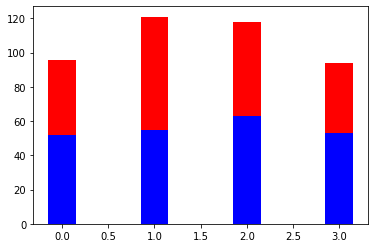

In [63]:
# 层叠条形图
index= np.arange(4)
sales_BJ = [52,55,63,53]
sales_SH = [44,66,55,41]

bar_width = 0.3

plt.bar(index, sales_BJ, bar_width,color = 'b')
plt.bar(index, sales_SH, bar_width,color = 'r',bottom = sales_BJ) #第二个柱状图在每个坐标轴累加值
plt.show()

水平双条形图

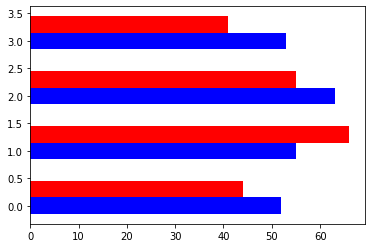

In [64]:
# 水平双条形图图
index= np.arange(4)
# index = [i+1.0 for i in index]
sales_BJ = [52,55,63,53]
sales_SH = [44,66,55,41]

bar_width = 0.3

plt.bar(x=0,
        bottom=index,
        width=sales_BJ,
        height=bar_width,
        color = 'b',
        orientation='horizontal')
plt.bar(x=0,
        bottom=index+bar_width,
        width=sales_SH,
        height=bar_width,
        color = 'r',
        orientation='horizontal')
plt.show()

水平层叠图

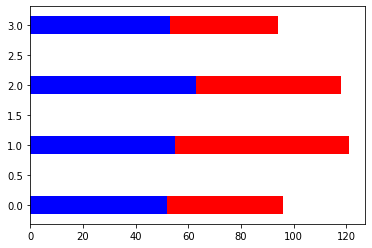

In [65]:
# 水平层叠图
index= np.arange(4)
sales_BJ = [52,55,63,53]
sales_SH = [44,66,55,41]

bar_width = 0.3

plt.bar(x=0,
        bottom=index,
        width=sales_BJ,
        height=bar_width,
        color = 'b',
        orientation='horizontal')
plt.bar(x=sales_BJ,
        bottom=index,
        width=sales_SH,
        height=bar_width,
        color = 'r',
        orientation='horizontal')
plt.show()

### （4）直方图
- 由一系列高度不等的纵向条形组成，表示数据分布的情况
- 列如同学的身高分布
- 与条形图的区别：
    - 条形图是用条形的长度表示各类别频数的多少，其宽度（表示类别）则是固定的； 
    - 直方图是用面积表示各组频数的多少，矩形的高度表示每一组的频数或频率,宽度则表示各组的组距,因此其高度与宽度均有意义.

**函数说明**

plt.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)

- x 输入数据，数组或形如shape (n，)数组序列，
- bins=None, 方箱宽度，整型设置箱子的宽度,或者array类型指定每个箱子的宽度,可选默认
- range=None, 显示范围,范围之外的将被舍弃,可选默认
- density=None, 是否进行标准化，频数转换为频率,可选默认
- weights=None, 
- cumulative=False, 
- bottom=None, 标量或类似数组，条形基础的y坐标，可选默认
- histtype='bar', 
- align='mid', 对齐{'left对齐左边', 'mid居中', 'right对齐右边'},可选默认:'mid居中'
- orientation='vertical', 直方图方向
- rwidth=None, 条形宽度占箱宽的占比
- color=None, 颜色
- label=None, 刻度标签

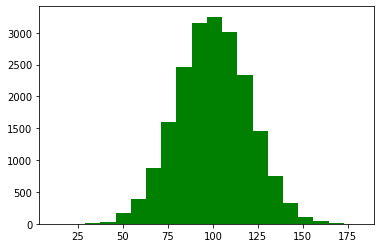

In [90]:
mu = 100 # mean of distribution
sigma = 20 # standard deviation sidtribution
x = mu + sigma * np.random.randn(20000)

    
plt.hist(x, 
         bins = 20, 
         color='green', 
         density=False) #是否进行标准化，频数转换为频率
plt.show()

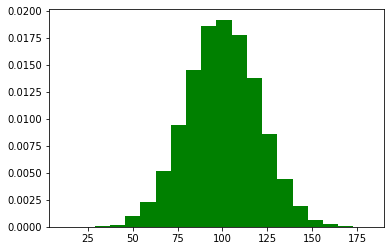

In [91]:
# 标准化
plt.hist(x, 
         bins = 20, 
         color='green', 
         density=True) #是否进行标准化，频数转换为频率
plt.show()

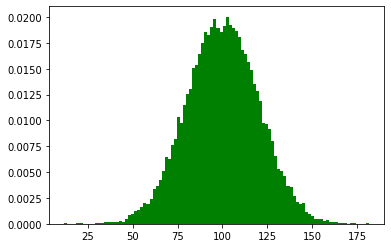

In [92]:
# 标准化
plt.hist(x, 
         bins = 100, 
         color='green', 
         density=True) #是否进行标准化，频数转换为频率
plt.show()

hist2D 双变量直方图

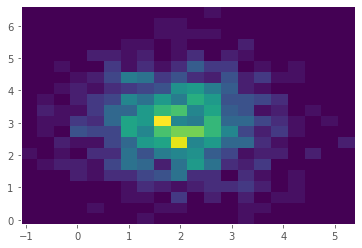

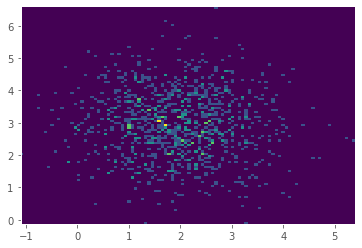

In [203]:
# 双变量直方图, 演示深浅表示频率
x = np.random.randn(1000)+2
y = np.random.randn(1000)+3

plt.hist2d(x, y, bins = 20)
plt.show()

plt.hist2d(x, y, bins = 100)
plt.show()

### （5）饼状图
- 饼状图显示数据中各类数据的大小与总数据量的占比
- 如某系列十大品牌的市场份额图

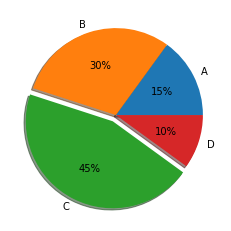

In [6]:
import matplotlib.pyplot as plt

# 饼状图
# plt.axes(aspect=1) #x轴&y轴的显示比例为1:1

labels = 'A','B','C','D'
fracs = [15,30,45,10]
explode = [0,0,0.08,0]

plt.pie(x = fracs,
        labels = labels,
        autopct='%.0f%%', #显示占比autopct='%.1f%%',
        explode=explode,  #突出显示：每个块远离中心的距离
        shadow=True) # 边缘阴影
plt.show()

### （6）箱型图
- 箱型图又称为盒式图或箱线图
- 用来显示一组数据的分散情况的统计图（数据分布的特征，多组数据分布特征的比较）
- 数据：上边缘、上四分位数、中位数、下四分位数、下边缘、异常值

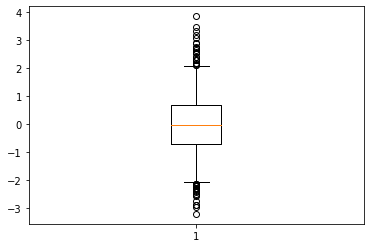

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 箱型图
np.random.seed(100)
data = np.random.normal(size=1000, loc=0.0, scale=1.0)

plt.boxplot(data,
            sym = 'o',  # sym 调整异常值的形状 
            whis = 1) # whis 代表虚线长度
plt.show()

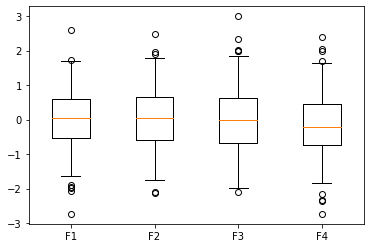

In [93]:
# 多个箱型图
data = np.random.normal(size=(100, 4), loc=0.0, scale=1.0)
labels = ['F1','F2','F3','F4']

plt.boxplot(data, 
            labels=labels,
            sym='o',
            whis=1.0)
plt.show()